# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import networkx as nx
import re
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
import itertools
import collections
from nltk import bigrams
import networkx as nx
from matplotlib import pylab
from tokenizer import tokenize
import time

In [ ]:
#!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

# Task 1

Read the dataset

In [ ]:
df = pd.read_csv('Keyword_data.csv')

# Creating copy of dataset for backup
df_copy = df.copy()

In [ ]:
# Displaying Garbage rows
df[df.count(axis=1)<2].head()

Title Keyword 1 Keyword 2 Keyword 3 Keyword 4 Keyword 5 Keyword 6  \
0   Feb/03       NaN       NaN       NaN       NaN       NaN       NaN   
1      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11  Apr/03       NaN       NaN       NaN       NaN       NaN       NaN   
12     NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   Keyword 7 Keyword 8 Keyword 9 Keyword 10 Keyword 11 Keyword 12  
0        NaN       NaN       NaN        NaN        NaN        NaN  
1        NaN       NaN       NaN        NaN        NaN        NaN  
10       NaN       NaN       NaN        NaN        NaN        NaN  
11       NaN       NaN       NaN        NaN        NaN        NaN  
12       NaN       NaN       NaN        NaN        NaN        NaN

In [ ]:
# Droping garbage rows
df = df[df.count(axis=1)>2].reset_index(drop=True).drop('Title', axis = 1)
df.head(3)

Keyword 1                 Keyword 2  \
0                         EQUITY  ORGANIZATIONAL sociology   
1    DIVERSIFICATION in industry         BUSINESS planning   
2  INTERORGANIZATIONAL relations      INTERGROUP relations   

                Keyword 3               Keyword 4          Keyword 5  \
0             PERFORMANCE           META-analysis      PSYCHOMETRICS   
1   PERFORMANCE standards  EMPLOYEES -- Rating of  CORPORATE culture   
2  BUSINESS communication             INVESTMENTS      SUPPLY chains   

                 Keyword 6                     Keyword 7  \
0  ORGANIZATIONAL research         FINANCIAL performance   
1       STRATEGIC planning  ORGANIZATIONAL effectiveness   
2     KNOWLEDGE management  INTERORGANIZATIONAL networks   

              Keyword 8                     Keyword 9  \
0         AGENCY theory  ORGANIZATIONAL effectiveness   
1    MANAGEMENT science           MANAGEMENT research   
2  CORPORATE governance         GROUP decision making   

                Keyword 10            Keyword 11 Keyword 12  
0  ORGANIZATIONAL behavior  CORPORATE governance        NaN  
1       PRODUCT management                   NaN        NaN  
2     INTELLECTUAL capital                   NaN        NaN

In [ ]:
str(len(df.melt().value.unique()))+' Unique Key-words in total. So our matrix will be (249 x 249)'

'249 Unique Key-words in total. So our matrix will be (249 x 249)'

In [ ]:
# Rearranging data to develop Matrix
li = []
for l in [[[y,z] for y in x for z in x if z!=y] for x in df.stack().groupby(level=0).agg(list)]:
    for k in l:
        #print(k[0],'*****************************\n\n')
        li = li + k[:1]
lj = []
for l in [[[y,z] for y in x for z in x if z!=y] for x in df.stack().groupby(level=0).agg(list)]:
    for k in l:
        #print(k[0],'*****************************\n\n')
        lj = lj + k[1:]

In [ ]:
# Developing Weighted matrix
adj_matrix = pd.crosstab(pd.DataFrame( lj, index = li).reset_index()['index'], pd.DataFrame( lj, index = li).reset_index()[0])
adj_matrix[:10]

0                        AGENCY theory  AGGRESSION (Psychology)  AMBIVALENCE  \
index                                                                          
AGENCY theory                        0                        0            0   
AGGRESSION (Psychology)              0                        0            0   
AMBIVALENCE                          0                        0            0   
ANGER in the workplace               0                        1            0   
BEHAVIORAL research                  0                        0            0   
BOARDS of directors                  1                        0            0   
BREAK-even analysis                  0                        0            0   
BURNOUT (Psychology)                 0                        0            0   
BUSINESS communication               0                        0            0   
BUSINESS enterprises                 0                        0            0   

0                        ANGER in the workplace  BEHAVIORAL research  \
index                                                                  
AGENCY theory                                 0                    0   
AGGRESSION (Psychology)                       1                    0   
AMBIVALENCE                                   0                    0   
ANGER in the workplace                        0                    0   
BEHAVIORAL research                           0                    0   
BOARDS of directors                           0                    0   
BREAK-even analysis                           0                    0   
BURNOUT (Psychology)                          0                    0   
BUSINESS communication                        0                    0   
BUSINESS enterprises                          0                    0   

0                        BOARDS of directors  BREAK-even analysis  \
index                                                               
AGENCY theory                              1                    0   
AGGRESSION (Psychology)                    0                    0   
AMBIVALENCE                                0                    0   
ANGER in the workplace                     0                    0   
BEHAVIORAL research                        0                    0   
BOARDS of directors                        0                    0   
BREAK-even analysis                        0                    0   
BURNOUT (Psychology)                       0                    0   
BUSINESS communication                     0                    0   
BUSINESS enterprises                       0                    0   

0                        BURNOUT (Psychology)  BUSINESS communication  \
index                                                                   
AGENCY theory                               0                       0   
AGGRESSION (Psychology)                     0                       0   
AMBIVALENCE                                 0                       0   
ANGER in the workplace                      0                       0   
BEHAVIORAL research                         0                       0   
BOARDS of directors                         0                       0   
BREAK-even analysis                         0                       0   
BURNOUT (Psychology)                        0                       0   
BUSINESS communication                      0                       0   
BUSINESS enterprises                        0                       0   

0                        BUSINESS enterprises  ...  VIOLENCE in the workplace  \
index                                          ...                              
AGENCY theory                               0  ...                          0   
AGGRESSION (Psychology)                     0  ...                          1   
AMBIVALENCE                                 0  ...                          0   
ANGER in the workplace                      0  ...             

In [ ]:
'''pd.DataFrame(zip(li,lj), columns=['Node 1','Node 2']).reset_index().groupby(['Node 1','Node 2']).count().reset_index()'''

"pd.DataFrame(zip(li,lj), columns=['Node 1','Node 2']).reset_index().groupby(['Node 1','Node 2']).count().reset_index()"

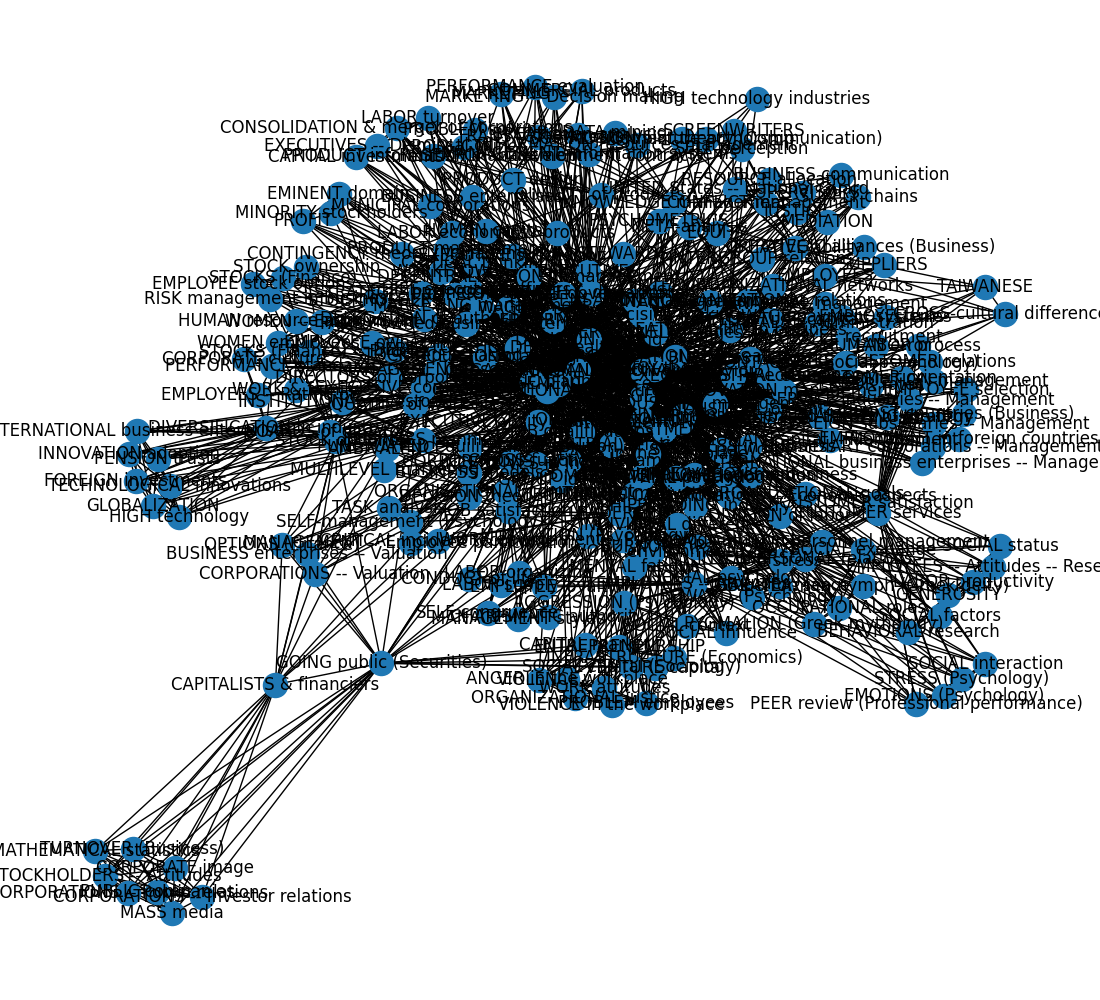

In [ ]:
# To make plot interactive
%matplotlib widget

# Converting matrix into network
g = nx.MultiGraph(adj_matrix)

# Adjusting figure size
plt.figure(figsize=(11,10))
# Plotting the network
nx.draw(g, with_labels=True)
plt.show()

In [ ]:
# Degree, Coresponding node, Weight of node named 'AGENCY theory'
len(list(g.adj['AGENCY theory'])), list(g.adj['AGENCY theory'].items())[:10]

(38,
 [('BOARDS of directors', AtlasView({0: {'weight': 1}})),
  ('CORPORATE governance', AtlasView({0: {'weight': 3}})),
  ('CORPORATIONS -- Finance', AtlasView({0: {'weight': 1}})),
  ('DEBT', AtlasView({0: {'weight': 1}})),
  ('DECISION making', AtlasView({0: {'weight': 1}})),
  ('DIRECTORS of corporations', AtlasView({0: {'weight': 1}})),
  ('EMPLOYEE ownership', AtlasView({0: {'weight': 1}})),
  ('EMPLOYEE selection', AtlasView({0: {'weight': 1}})),
  ('EMPLOYMENT in foreign countries', AtlasView({0: {'weight': 1}})),
  ('EQUITY', AtlasView({0: {'weight': 1}}))])

In [ ]:
df_analysis = pd.merge(pd.DataFrame(g.degree(), columns=['Node','Degree']), 
                       pd.DataFrame(g.degree(weight='weight'), columns=['Node','Strength'])).set_index('Node')

In [ ]:
print('Top 10 nodes by degree')
print(df_analysis.sort_values(by='Degree', ascending=False)[:10])
print('\n*************************************************\n\nTop 10 nodes by Strength')
print(df_analysis.sort_values(by='Strength', ascending=False)[:10])

Top 10 nodes by degree
                              Degree  Strength
Node                                          
ORGANIZATIONAL behavior          166       265
ORGANIZATIONAL effectiveness     104       144
MANAGEMENT science               102       136
PERSONNEL management              93       126
DECISION making                   90       112
ORGANIZATIONAL structure          74       107
ORGANIZATIONAL sociology          66        96
STRATEGIC planning                66        80
INDUSTRIAL management             64        84
CORPORATE governance              62        85

*************************************************

Top 10 nodes by Strength
                              Degree  Strength
Node                                          
ORGANIZATIONAL behavior          166       265
ORGANIZATIONAL effectiveness     104       144
MANAGEMENT science               102       136
PERSONNEL management              93       126
DECISION making                   90       112
ORGANIZ

In [ ]:
df_edges = pd.DataFrame(nx.get_edge_attributes(g, 'weight').keys(), columns = ['Node 1','Node 2','Weight'])
df_edges.Weight = nx.get_edge_attributes(g, 'weight').values()
print('Top 10 pairs of node by weight')
df_edges.sort_values(by = 'Weight', ascending = False)[:10]

Top 10 pairs of node by weight


Node 1                        Node 2  Weight
1796       ORGANIZATIONAL behavior  ORGANIZATIONAL effectiveness      11
1800       ORGANIZATIONAL behavior      ORGANIZATIONAL structure       9
1802       ORGANIZATIONAL behavior          PERSONNEL management       8
1648            MANAGEMENT science       ORGANIZATIONAL behavior       7
1881  ORGANIZATIONAL effectiveness      ORGANIZATIONAL structure       6
1799       ORGANIZATIONAL behavior      ORGANIZATIONAL sociology       6
704                DECISION making       ORGANIZATIONAL behavior       6
437           CORPORATE governance       ORGANIZATIONAL behavior       6
1945      ORGANIZATIONAL sociology        TEAMS in the workplace       5
1279         INDUSTRIAL management       ORGANIZATIONAL behavior       5

[]

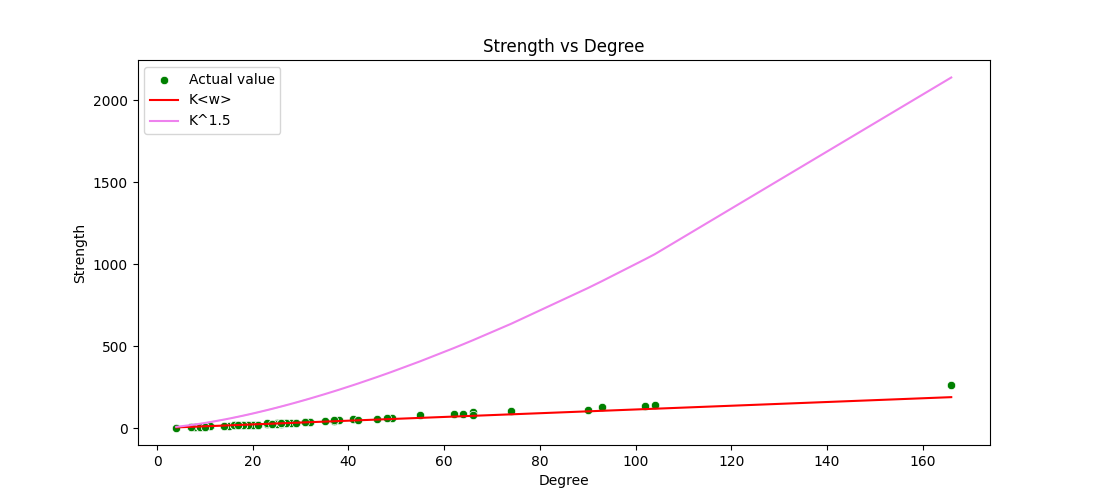

In [ ]:
%matplotlib widget
plt.figure(figsize=(11,5))
sn.scatterplot(x = df_analysis.Degree, y = df_analysis.Strength, color = 'green', label = 'Actual value')
sn.lineplot( x = df_analysis.Degree, y = df_analysis.Degree*df_analysis.Strength.sum()/(2*2141), color = 'r', label='K<w>')
sn.lineplot( x = df_analysis.Degree, y = df_analysis.Degree**1.5, color = 'violet', label='K^1.5').set(title='Strength vs Degree')
plt.plot()

# Task 2

Reading files

In [ ]:
df_2017 = pd.read_csv("2017.csv", usecols = ['tweet'])
df_2018 = pd.read_csv("2018.csv", usecols = ['tweet'])
df_2019 = pd.read_csv("2019.csv", usecols = ['tweet'])
df_2020 = pd.read_csv("2020.csv", usecols = ['tweet'])
df_2021 = pd.read_csv("2021.csv", usecols = ['tweet'])
df_2022 = pd.read_csv("2022.csv", usecols = ['tweet'])

In [ ]:
df_2017.head()

tweet
0                @neilsiegel @Tesla Coming very soon
1       @Kreative Vastly better maps/nav coming soon
2                                       @dd_hogan Ok
3                                 @Jason @Tesla Sure
4  @kabirakhtar Yeah, it’s terrible. Had to upgra...

In [ ]:
#          Stopwords

#nltk.download("stopwords")
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Custom function to clean the tweets and remove stop words

In [ ]:
def clean(tweet):
    temp = tweet.lower()    # converting all letters to lowercase
    temp = re.sub("'", "", temp)  # removing contractions
    temp = re.sub("@[\S]+","", temp)  # removing mentions
    
    temp = temp.replace("#", "")  # removing hashtags
    temp = re.sub(r'http\S+', '', temp)    # removing links
    temp = re.sub(r'[\.,()*!?]', '', temp)        # removing punctuations
    
    temp = re.sub("[^a-z0-9]"," ", temp)   # removing non-alphanumeric characters like emojis
    
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords_list] # removing stop words
    temp = " ".join(word for word in temp)
    return temp

Storing the cleaned tweets back in the tweet column

In [ ]:
df_2017['tweet'] = df_2017['tweet'].map(lambda x: clean(x))
df_2018['tweet'] = df_2018['tweet'].map(lambda x: clean(x))
df_2019['tweet'] = df_2019['tweet'].map(lambda x: clean(x))
df_2020['tweet'] = df_2020['tweet'].map(lambda x: clean(x))
df_2021['tweet'] = df_2021['tweet'].map(lambda x: clean(x))
df_2022['tweet'] = df_2022['tweet'].map(lambda x: clean(x))

In [ ]:
df_2017

tweet
0                                           coming soon
1                    vastly better maps nav coming soon
2                                                    ok
3                                                  sure
4     yeah terrible upgrade old linux os bunch drive...
...                                                 ...
3162                             total non sequitur btw
3163  great voltaire quote arguably better twain hea...
3164  made volume model go 11 need work miniature st...
3165  went iceland sat ride bumper cars ice country ...
3166  please ignore prior tweets someone pretending ...

[3167 rows x 1 columns]

In [ ]:
years = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

Function for tokenizing the tweets by words and computing word frequency

In [ ]:
# function for tokenizing the tweets by words and computing word frequency
def word_freq(df):
  words = []
  for i in df['tweet']:
    words.append(word_tokenize(i))

  return FreqDist(pd.DataFrame(words).stack().rename('Words'))

Function for printing word frequencies for each year; Execution time: around 1 min

In [ ]:
# function for printing word frequencies for each year 

for i in years:
  wordfrequency = word_freq(i)
  print('Word Frequencies of tweets',*wordfrequency.items(), sep='\n')


Word Frequencies of tweets
('coming', 56)
('soon', 67)
('vastly', 4)
('better', 58)
('maps', 1)
('nav', 3)
('ok', 27)
('sure', 47)
('yeah', 67)
('terrible', 3)
('upgrade', 12)
('old', 10)
('linux', 6)
('os', 3)
('bunch', 2)
('drivers', 2)
('first', 93)
('major', 15)
('browser', 7)
('upgrades', 5)
('cars', 77)
('months', 27)
('note', 9)
('slower', 3)
('code', 8)
('optimized', 1)
('similar', 6)
('total', 7)
('size', 17)
('maybe', 55)
('slightly', 10)
('bigger', 7)
('account', 3)
('really', 71)
('gamechanging', 1)
('think', 41)
('feature', 9)
('like', 137)
('add', 12)
('sustainable', 6)
('energy', 28)
('production', 48)
('solar', 45)
('batteries', 12)
('grow', 2)
('much', 67)
('faster', 11)
('auto', 23)
('percentage', 1)
('basis', 1)
('big', 32)
('focus', 3)
('next', 103)
('year', 64)
('primary', 8)
('remaining', 3)
('model', 208)
('3', 96)
('ramp', 8)
('gon', 3)
('na', 3)
('say', 28)
('last', 33)
('one', 95)
('sounds', 17)
('good', 171)
('cheesy', 2)
('fun', 11)
('update', 28)
('done', 3

Function for printing top 10 words with highest value of frequency for each year

In [ ]:
for i in years:
  wordfrequency = word_freq(i)
  print('Top 10 words', wordfrequency.most_common(10))

Top 10 words [('tesla', 308), ('amp', 219), ('model', 208), ('good', 171), ('rocket', 149), ('like', 137), ('yes', 132), ('launch', 112), ('next', 103), ('falcon', 99)]
Top 10 words [('amp', 527), ('tesla', 290), ('car', 121), ('3', 112), ('yes', 107), ('good', 102), ('model', 98), ('like', 95), ('would', 77), ('people', 74)]
Top 10 words [('amp', 1218), ('tesla', 847), ('yes', 392), ('model', 373), ('good', 358), ('like', 315), ('car', 287), ('3', 281), ('would', 273), ('great', 243)]
Top 10 words [('amp', 1822), ('tesla', 1048), ('yes', 553), ('good', 471), ('model', 403), ('like', 395), ('great', 372), ('would', 369), ('3', 331), ('car', 329)]
Top 10 words [('amp', 476), ('tesla', 213), ('great', 102), ('good', 98), ('much', 93), ('haha', 89), ('like', 89), ('would', 89), ('time', 86), ('beta', 77)]
Top 10 words [('amp', 80), ('tesla', 62), ('people', 34), ('would', 32), ('yes', 32), ('one', 30), ('starlink', 28), ('good', 28), ('car', 26), ('great', 22)]


Function to display word frequency histograms for each year

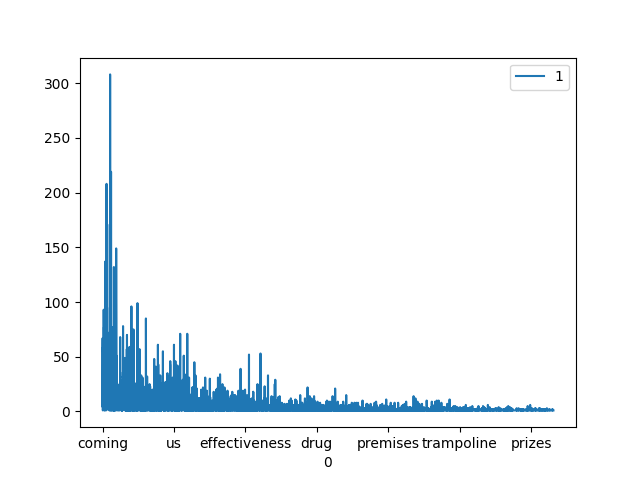

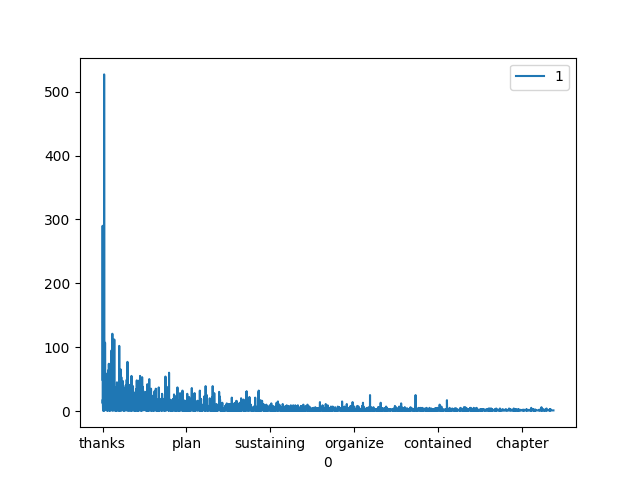

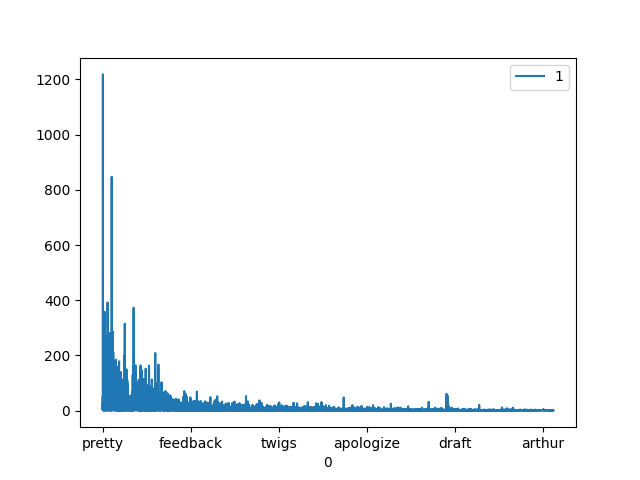

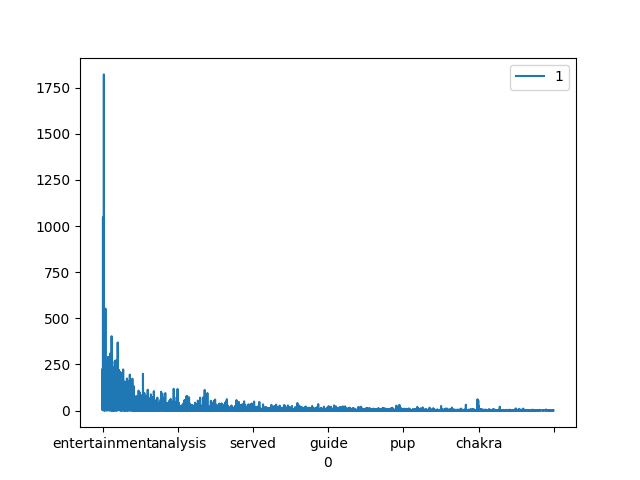

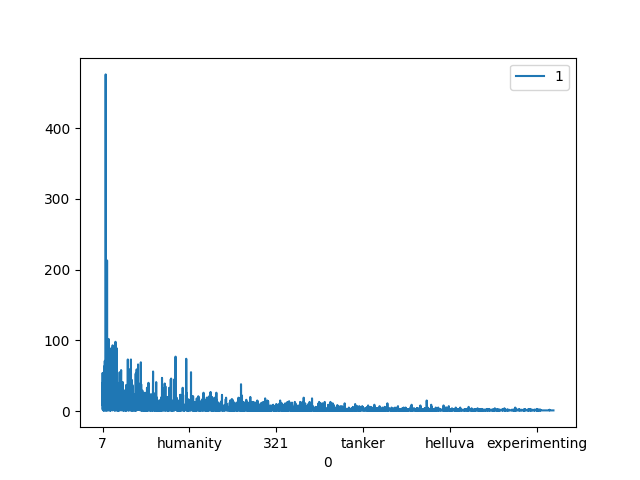

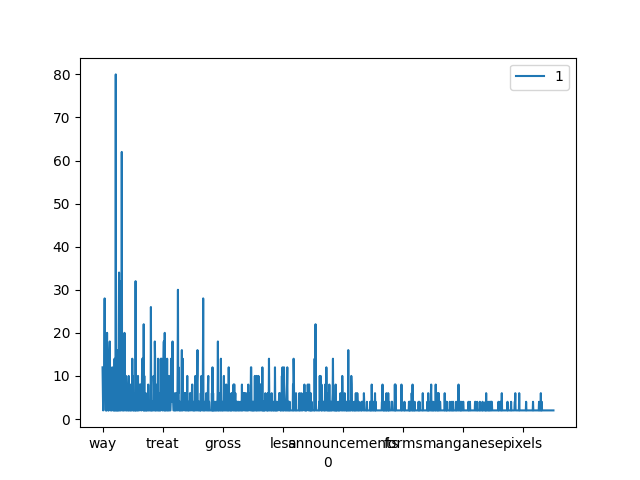

In [ ]:
for i in years:
    pd.DataFrame.from_dict(word_freq(i).items()).set_index(0).plot()

Zipf’s law log-log plots of word frequencies and rank for each year

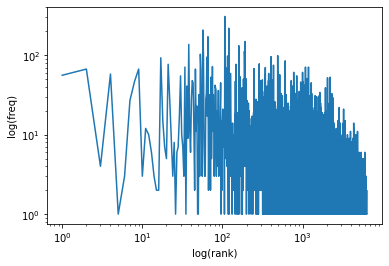

In [ ]:
#zipf's law
#2017

zipf2017 = word_freq(df_2017) 
freqs17 = list(zipf2017.values())
n = len(freqs17)
ranks17 = range(1, n+1)                 
pylab.loglog(ranks17, freqs17) #this plots frequency, not relative frequency
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.show()

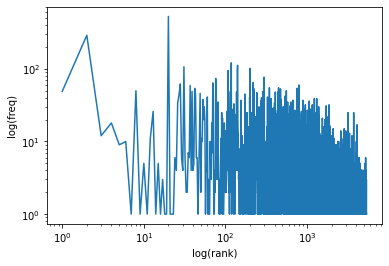

In [ ]:
#2018
zipf2018 = word_freq(df_2018) 
freqs18 = list(zipf2018.values())
n = len(freqs18)
ranks18 = range(1, n+1)                 
pylab.loglog(ranks18, freqs18) #this plots frequency, not relative frequency
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.show()

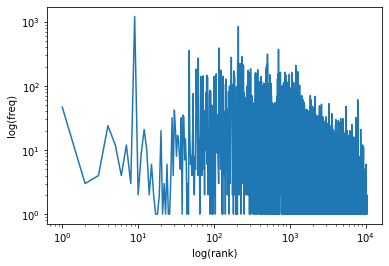

In [ ]:
#2019
zipf2019 = word_freq(df_2019) 
freqs19 = list(zipf2019.values())
n = len(freqs19)
ranks19 = range(1, n+1)             
pylab.loglog(ranks19, freqs19) #this plots frequency, not relative frequency
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.show()

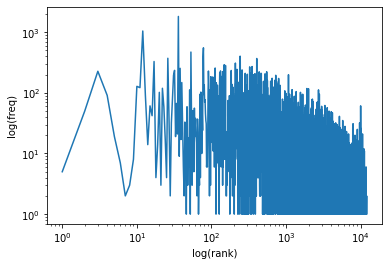

In [ ]:
#2020
zipf2020 = word_freq(df_2020) 
freqs20 = list(zipf2020.values())
n = len(freqs20)
ranks20 = range(1, n+1)             
pylab.loglog(ranks20, freqs20) #this plots frequency, not relative frequency
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.show()

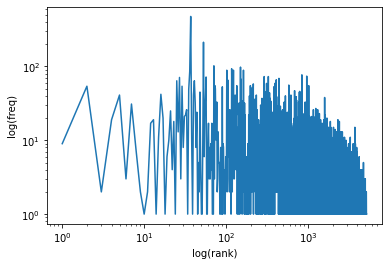

In [ ]:
#2021
zipf2021 = word_freq(df_2021) 
freqs21 = list(zipf2021.values())
n = len(freqs21)
ranks21 = range(1, n+1)             
pylab.loglog(ranks21, freqs21) #this plots frequency, not relative frequency
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.show()

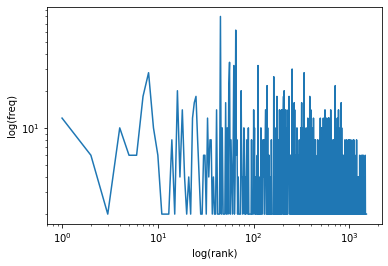

In [ ]:
#2022
zipf2022 = word_freq(df_2022) 
freqs22 = list(zipf2022.values())
n = len(freqs22)
ranks22 = range(1, n+1)             
pylab.loglog(ranks22, freqs22) #this plots frequency, not relative frequency
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.show()

Function to get bigrams from tweets

In [ ]:
def bigrams(df):
  words = []
  for i in df['tweet']:
    words.append(word_tokenize(i))
    
  return nltk.bigrams(pd.DataFrame(words).stack().rename('Words'))

Printing bigrams for each year

In [ ]:
for i in years:
  print(list(bigrams(i))) 

[('coming', 'soon'), ('soon', 'vastly'), ('vastly', 'better'), ('better', 'maps'), ('maps', 'nav'), ('nav', 'coming'), ('coming', 'soon'), ('soon', 'ok'), ('ok', 'sure'), ('sure', 'yeah'), ('yeah', 'terrible'), ('terrible', 'upgrade'), ('upgrade', 'old'), ('old', 'linux'), ('linux', 'os'), ('os', 'bunch'), ('bunch', 'drivers'), ('drivers', 'first'), ('first', 'major'), ('major', 'browser'), ('browser', 'upgrades'), ('upgrades', 'coming'), ('coming', 'cars'), ('cars', 'months'), ('months', 'note'), ('note', 'slower'), ('slower', 'first'), ('first', 'code'), ('code', 'optimized'), ('optimized', 'similar'), ('similar', 'total'), ('total', 'size'), ('size', 'maybe'), ('maybe', 'slightly'), ('slightly', 'bigger'), ('bigger', 'account'), ('account', 'really'), ('really', 'gamechanging'), ('gamechanging', 'think'), ('think', 'feature'), ('feature', 'like'), ('like', 'add'), ('add', 'sustainable'), ('sustainable', 'energy'), ('energy', 'production'), ('production', 'solar'), ('solar', 'batteri

Plotting bigram network graphs for each year for the 50 most common bigrams

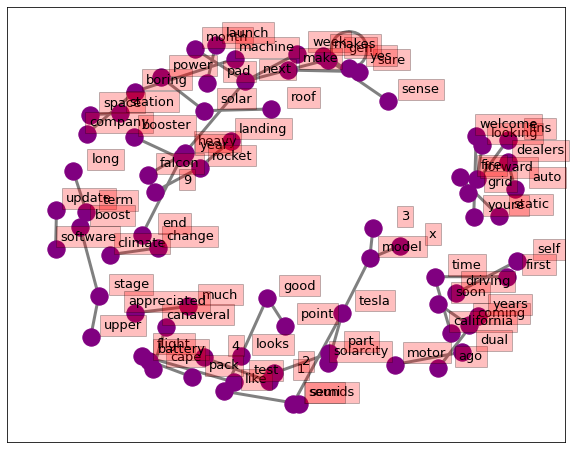

In [ ]:
#2017
bg = bigrams(df_2017)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

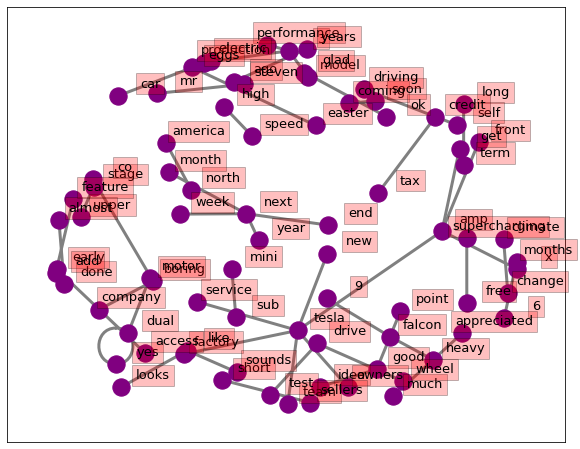

In [ ]:
#2018
bg = bigrams(df_2018)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

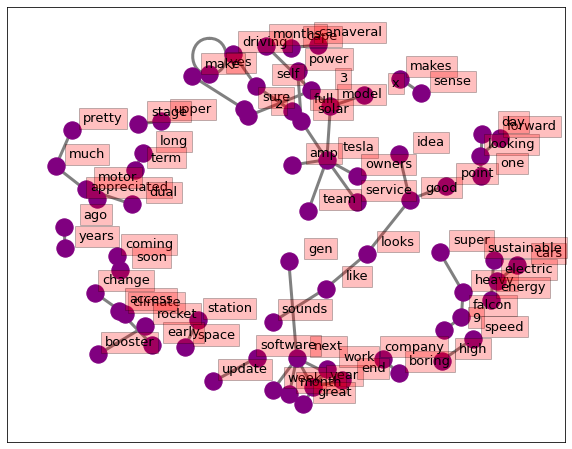

In [ ]:
#2019
bg = bigrams(df_2019)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

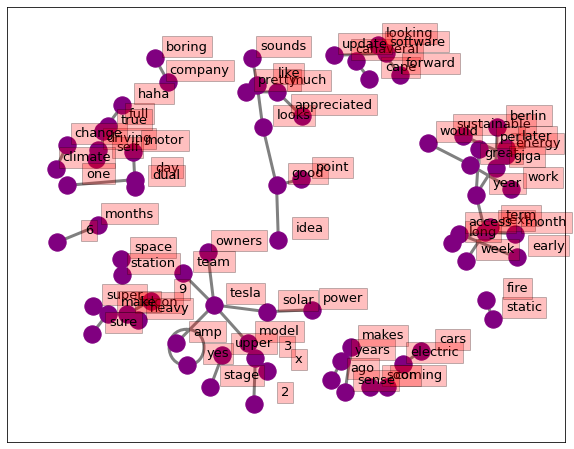

In [ ]:
#2020
bg = bigrams(df_2020)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

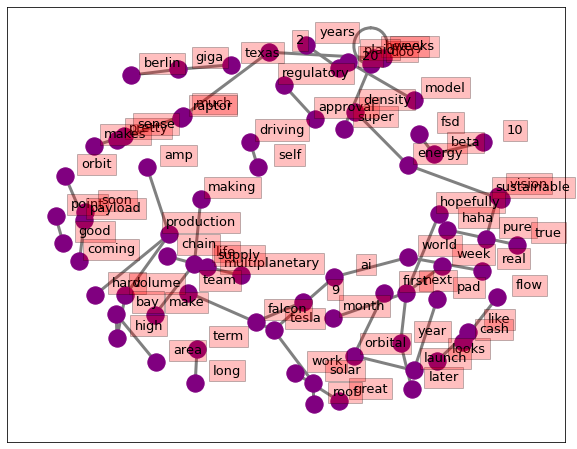

In [ ]:
#2021
bg = bigrams(df_2021)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


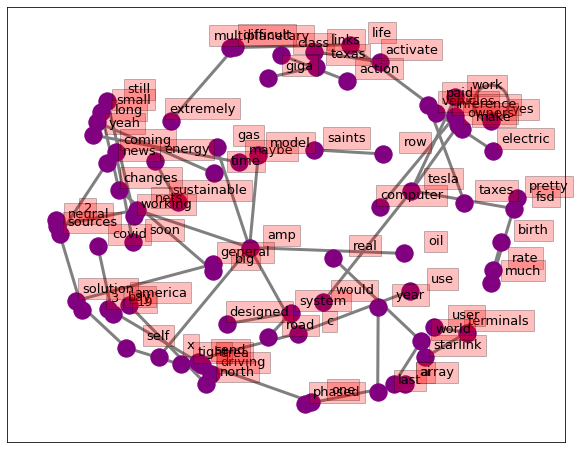

In [ ]:
#2022
bg = bigrams(df_2022)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()